---
#  Python Mini Project by Abhishek Ankushe

---

-----
# **Import Required Libraries**

-----

In [6]:
# Importing necessary libraries for EDA, Visualization, and Data Handling

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings cluttering the notebook

import warnings
warnings.filterwarnings('ignore')

# Mounting Google Drive for file access in Colab

from google.colab import drive
drive.mount('/content/drive') 



ModuleNotFoundError: No module named 'google.colab'

#Data Loading & Understanding

In [ ]:
# Loading the dataset from the CSV file

df = pd.read_csv('/content/Students Social Media Addiction (1).csv')


**Display the first 5**

In [ ]:
# Display the first 5 records to understand the structure

df.head()


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [ ]:
# Showing a random sample of 5 records

df.sample(5)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
104,105,22,Male,Graduate,Afghanistan,2.9,LinkedIn,No,7.0,7,Complicated,2,5
165,166,21,Male,Graduate,Maldives,5.4,TikTok,Yes,6.0,6,In Relationship,4,8
121,122,21,Female,Graduate,Maldives,4.6,Instagram,No,7.4,8,In Relationship,2,5
613,614,21,Male,Undergraduate,Canada,5.7,Instagram,Yes,6.7,6,Single,3,7
247,248,22,Male,Graduate,Germany,3.9,Instagram,No,7.8,8,Single,1,4


In [ ]:
# Check the number of columns and rows in the dataframe

print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 705
Number of columns: 13


In [ ]:
# Descriptive view of the dataframe

df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


#Data Cleaning

 **Handle missing values, if any**

In [ ]:
# Checking for any missing values in the dataset

print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64


---
- *From the above code we found that there are no null values*
- *But if there were any null values then to handle missing values following will be applied*

---

**We can use two methods for cleaning null values**

1. Dropping the null value rows

In [ ]:

df.dropna(inplace = True)


2. Filling missing values in numerical columns with the mean of the column

In [ ]:
# Checking missing values before applying fillna
print("Missing values BEFORE applying fillna:")
print(df.isnull().sum())
print('-' * 50)

numerical_cols = df.select_dtypes(include = np.number).columns

for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace = True)

# Checking missing values after applying fillna
print("\nMissing values AFTER applying fillna:")
print(df.isnull().sum())

Missing values BEFORE applying fillna:
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64
--------------------------------------------------

Missing values AFTER applying fillna:
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted

In [ ]:

print("\nData Types:\n", df.dtypes)  # Checking data types of each column

# No missing values or type correction needed (based on data); if required then
# we use convert. For example: df['Age'] = df['Age'].astype(int)


Data Types:
 Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
Risk_Level                       object
Detox_Suggestion                 object
dtype: object


---
- *As seen on the above result datatypes are good and does not require any cleaning*
- *But if there were any dataypes mismatch then we can use the following*
---

**We can use two methods for datatype correction**

1. Using astype()

In [ ]:
# if Age column (integer) had incorrect datatype, the following code will fix it

df['Age'] = df['Age'].astype(int)


2. using pd.to_numeric()

In [ ]:
# Check the datatype before conversion
print("\nDatatype of 'Avg_Daily_Usage_Hours' BEFORE conversion:")
print(df['Avg_Daily_Usage_Hours'].dtype)
print('-' * 80)

# Convert 'Avg_Daily_Usage_Hours' to numeric
df['Avg_Daily_Usage_Hours'] = pd.to_numeric(df['Avg_Daily_Usage_Hours'], errors = 'coerce')

# Check for any values that couldn't be converted
print("\nNumber of non-numeric values after converting 'Avg_Daily_Usage_Hours':")
print(df['Avg_Daily_Usage_Hours'].isnull().sum())
print('-' * 80)

# Verify the datatype
print("\nDatatype of 'Avg_Daily_Usage_Hours' AFTER conversion:")
print(df['Avg_Daily_Usage_Hours'].dtype)


Datatype of 'Avg_Daily_Usage_Hours' BEFORE conversion:
float64
--------------------------------------------------------------------------------

Number of non-numeric values after converting 'Avg_Daily_Usage_Hours':
0
--------------------------------------------------------------------------------

Datatype of 'Avg_Daily_Usage_Hours' AFTER conversion:
float64


### Understanding relationships between Age, Gender & Daily Usage

In [ ]:
# Average daily usage hours by age
usage_by_age = df.groupby('Age')['Avg_Daily_Usage_Hours'].mean()
print("Average Daily Usage by Age:")
print(f"{usage_by_age}\n")
print('-' * 50)

# Average daily usage hours by gender
print("\nAverage Daily Usage by Gender:")
usage_by_gender = df.groupby('Gender')['Avg_Daily_Usage_Hours'].mean()
print(usage_by_gender)

Average Daily Usage by Age:
Age
18    5.385714
19    5.120245
20    4.930303
21    4.950641
22    4.676190
23    4.508824
24    5.046154
Name: Avg_Daily_Usage_Hours, dtype: float64

--------------------------------------------------

Average Daily Usage by Gender:
Gender
Female    5.011048
Male      4.826136
Name: Avg_Daily_Usage_Hours, dtype: float64


---
**Age, Gender & Daily Usage data observations :**
- *Students aged 18 tend to have the highest average daily usage, while students aged 23 tend to have the lowest*.
- *The average daily social media usage is slightly higher for female students compared to male students*.
---

**bold text**  Understanding relationships between Sleep patterns, Academic performance & Social interaction

In [ ]:
# Average sleep hours per night by affect on affect on academic performance
print("Relationship between Sleep Hours and Academic Performance:")
academic_vs_sleepHours = df.groupby('Affects_Academic_Performance')['Sleep_Hours_Per_Night'].mean()
print(f"{academic_vs_sleepHours}\n")
print('-' * 50)

# Average mental health score by sleep hours per night
print("\nRelationship between Sleep Hours and Mental Health Score:")
sleepHours_vs_mentalHealth = df.groupby('Sleep_Hours_Per_Night')['Mental_Health_Score'].mean()
print(f"{sleepHours_vs_mentalHealth.head(10)}\n")
print('-' * 50)

# Average social media conflicts by relationship status
print("\nRelationship between Conflicts over Social Media and Relationship Status:")
rel_status_vs_conflict = df.groupby('Relationship_Status')['Conflicts_Over_Social_Media'].mean()
print(rel_status_vs_conflict)

Relationship between Sleep Hours and Academic Performance:
Affects_Academic_Performance
No     7.813095
Yes    6.343709
Name: Sleep_Hours_Per_Night, dtype: float64

--------------------------------------------------

Relationship between Sleep Hours and Mental Health Score:
Sleep_Hours_Per_Night
3.8    5.000000
3.9    5.000000
4.0    5.000000
4.1    5.500000
4.2    5.500000
4.3    5.500000
4.4    5.500000
4.5    5.000000
4.6    5.666667
4.7    5.666667
Name: Mental_Health_Score, dtype: float64

--------------------------------------------------

Relationship between Conflicts over Social Media and Relationship Status:
Relationship_Status
Complicated        3.031250
In Relationship    2.761246
Single             2.901042
Name: Conflicts_Over_Social_Media, dtype: float64


---
**Sleep Patterns, Academic Results & Social Interaction – Key Insights:**
- *Students  whose academic performance suffers due to social media generally sleep fewer hours compared to those whose studies remain unaffected.*  
- *A noticeable pattern shows that students with reduced nightly sleep often have lower mental health ratings.*  
- *Those in “Complicated” relationships report somewhat higher social media conflict levels than peers who are “Single” or “In a Relationship”.*  
---

### Addiction variation across demographics

**Exploratory Data Analysis & Visualization**

In [ ]:
# Average addiction score by Gender
print("Average Addiction Score by Gender:")
print(f"{df.groupby('Gender')['Addicted_Score'].mean()}\n")
print('-' * 50)

# Average addiction score by Academic Level
print("\nAverage Addiction Score by Academic Level:")
print(f"{df.groupby('Academic_Level')['Addicted_Score'].mean()}\n")
print('-' * 50)

# Average addiction score by Age
print("\nAverage Addiction Score by Age:")
print(df.groupby('Age')['Addicted_Score'].mean())

Average Addiction Score by Gender:
Gender
Female    6.515581
Male      6.357955
Name: Addicted_Score, dtype: float64

--------------------------------------------------

Average Addiction Score by Academic Level:
Academic_Level
Graduate         6.243077
High School      8.037037
Undergraduate    6.492918
Name: Addicted_Score, dtype: float64

--------------------------------------------------

Average Addiction Score by Age:
Age
18    7.785714
19    6.650307
20    6.478788
21    6.589744
22    6.095238
23    5.676471
24    6.115385
Name: Addicted_Score, dtype: float64


---
**Addiction across demographic (gender, academic level & age) observations :**
- *Addiction score tends to be higher in Females but only by a slight margin*.
- *High School students tend to have higher addiction score*.
- S*tudents aged 18 years have the highest addiction score*.

---

### Average addiction level across different Genders

In [ ]:
print("Average addiction level by Gender:")
print('-' * 40)
print(df.groupby('Gender')['Addicted_Score'].mean())

Average addiction level by Gender:
----------------------------------------
Gender
Female    6.515581
Male      6.357955
Name: Addicted_Score, dtype: float64


### Average addiction level across different Age groups

In [ ]:
print("\nAverage addiction level by Age group:")
print('-' * 40)
print(df.groupby('Age')['Addicted_Score'].mean())


Average addiction level by Age group:
----------------------------------------
Age
18    7.785714
19    6.650307
20    6.478788
21    6.589744
22    6.095238
23    5.676471
24    6.115385
Name: Addicted_Score, dtype: float64


### Average addiction level across different Education levels

In [ ]:
print("\nAverage addiction level by Education level:")
print('-' * 45)
print(df.groupby('Academic_Level')['Addicted_Score'].mean())


Average addiction level by Education level:
---------------------------------------------
Academic_Level
Graduate         6.243077
High School      8.037037
Undergraduate    6.492918
Name: Addicted_Score, dtype: float64


### Classifying risk level (Low/Medium/High) based on usage hours

In [ ]:
def classify_risk(usage_hours):
    '''
    This function returns the risk level based on the average daily usage hours passed in the argument.
    It uses if elif else conditions to return the appropriate risk level.
    '''

    if usage_hours < 3:
        return "Low Risk"

    elif 3 <= usage_hours < 6:
        return "Medium Risk"

    else:
        return "High Risk"

# creating a new column for risk level with the risk level returned from above function
df['Risk_Level'] = df['Avg_Daily_Usage_Hours'].apply(classify_risk)

print("Risk Level Classification:")
print('-' * 30)
print(df['Risk_Level'].value_counts())

Risk Level Classification:
------------------------------
Risk_Level
Medium Risk    512
High Risk      150
Low Risk        43
Name: count, dtype: int64


### Preparing Digital detox strategies

In [ ]:
def suggest_detox(risk_level):
    '''
    This function returns digital detox strategies based on the risk level passed in the argument.
    It is using if elif else conditions to return the appropriate strategy.
    '''

    if risk_level == "High Risk":
        return "Consider significantly reducing usage, setting strict limits, and seeking professional help if needed."

    elif risk_level == "Medium Risk":
        return "Try setting daily time limits, scheduling screen-free activities, and being mindful of usage."

    else:
        return "Continue healthy usage habits, be aware of potential triggers, and maintain a balanced lifestyle."

# creating a new column for Detox suggestions with the values returned from the above function
df['Detox_Suggestion'] = df['Risk_Level'].apply(suggest_detox)

print("\nDigital Detox Suggestions:")
print('-' * 30)

# taking a random sample of 5 records to show a the Detox assessment
for index, row in df.sample(5).iterrows():
    print(f"For Student ID {row['Student_ID']} ({row['Risk_Level']}): {row['Detox_Suggestion']}\n")


Digital Detox Suggestions:
------------------------------
For Student ID 626 (Medium Risk): Try setting daily time limits, scheduling screen-free activities, and being mindful of usage.

For Student ID 472 (Low Risk): Continue healthy usage habits, be aware of potential triggers, and maintain a balanced lifestyle.

For Student ID 677 (Medium Risk): Try setting daily time limits, scheduling screen-free activities, and being mindful of usage.

For Student ID 86 (Medium Risk): Try setting daily time limits, scheduling screen-free activities, and being mindful of usage.

For Student ID 182 (Medium Risk): Try setting daily time limits, scheduling screen-free activities, and being mindful of usage.



### Visualizing the data



### Bar chart: Average Addiction Score by Academic Level

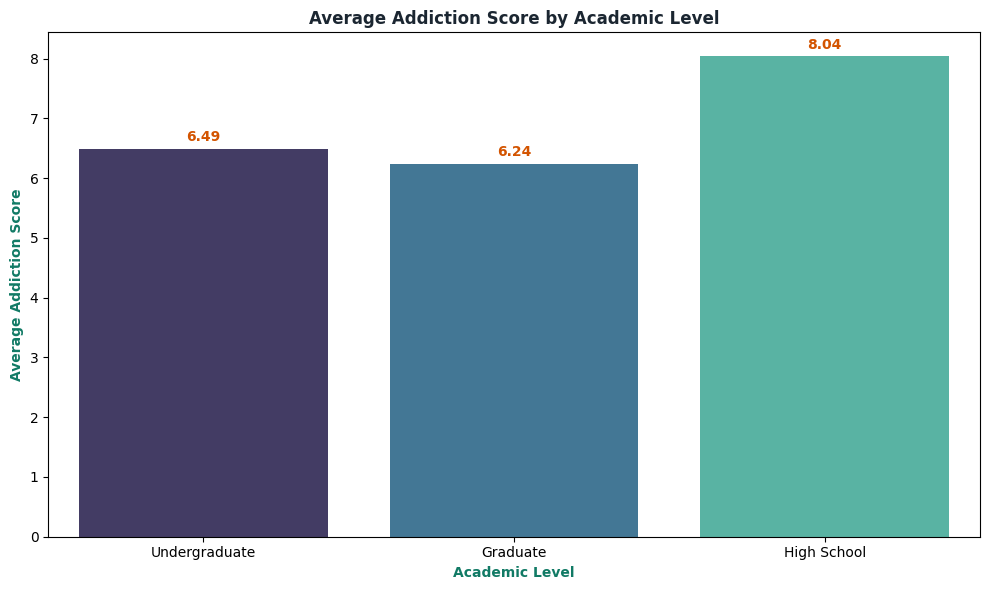

In [ ]:
plt.figure(figsize = (10, 6))

# creating a bar plot
ax = sns.barplot(
    x = 'Academic_Level',
    y = 'Addicted_Score',
    data = df,
    palette = 'mako',
    ci = None
)
plt.title('Average Addiction Score by Academic Level', color = '#1B2631', weight = 'bold')  #
plt.ylabel('Average Addiction Score', color = '#117A65', weight = 'bold')
plt.xlabel('Academic Level', color = '#117A65', weight = 'bold')

# Add labels above the bars
for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f', padding = 3, color = '#D35400', weight = 'bold')

plt.tight_layout()
plt.show()


---
**Bar plot Insight:**
- *High School students show the highest average addiction score compared to Undergraduate and Graduate students*.
-  *Graduate and Undergraduate students have almost similar addiction scores.*

---

### Pie chart: Distribution of Risk Levels

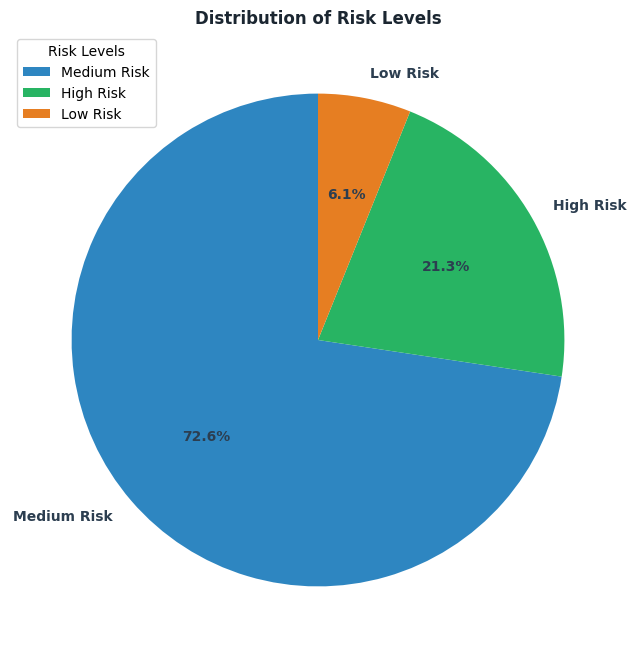

In [ ]:
risk_counts = df['Risk_Level'].value_counts()  # count of risk level
plt.figure(figsize = (8, 8))

# creating a pie chart
plt.pie(
    risk_counts,
    labels = risk_counts.index,
    autopct = '%1.1f%%',
    startangle = 90,
    colors = sns.color_palette(['#2E86C1', '#28B463', '#E67E22', '#C0392B']),
    textprops={'color': '#2C3E50', 'weight': 'bold'}
plt.title('Distribution of Risk Levels', color = '#1B2631', weight = 'bold')
plt.legend(title="Risk Levels", loc="upper left", bbox_to_anchor=(0, 1))
plt.show()


 ---
 **Pie chart Insight:**
- *The "Medium Risk" category represents the largest portion of the student population studied.*
- *While "High Risk" is a smaller percentage, it still indicates a significant number of students who may be experiencing more severe issues related to social media usage.*
- *The "Low Risk" category is the smallest, suggesting that only a minority of students maintain low social media usage habits.*
---

### Heatmap: Correlation matrix of numerical columns

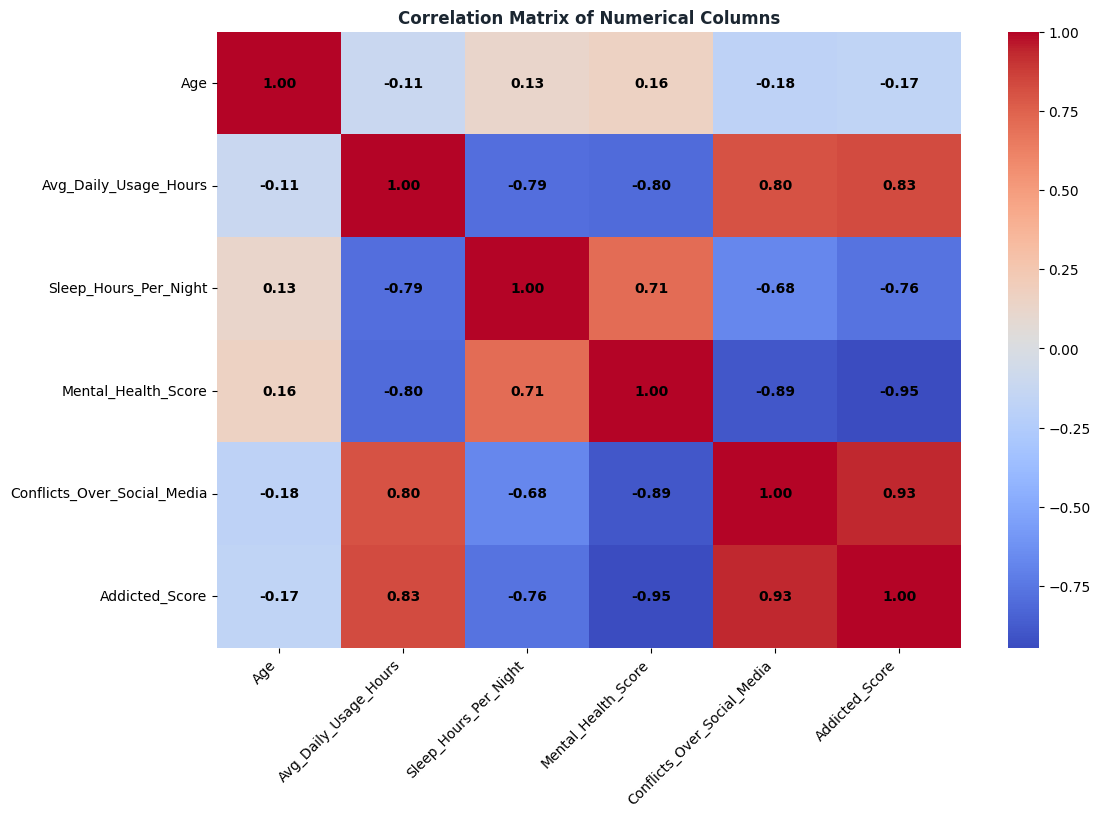

In [ ]:
plt.figure(figsize = (12, 8))

# creating a heat map
sns.heatmap(
    df[['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
        'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']]
    .corr(),
    annot = True,
    cmap = 'coolwarm',
    fmt = ".2f",
    annot_kws={"weight": "bold", "color": "black"}
)
plt.title('Correlation Matrix of Numerical Columns', color = '#1B2631', weight = 'bold')
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(rotation = 0)
plt.show()


---

   **Heatmap Observations**/**Insight:**
   
- *Students who spend more time on social media each day usually show higher addiction levels. This is reflected by the strong positive correlation (0.83) between Avg_Daily_Usage_Hours and Addicted_Score.*  
- *Greater addiction scores are linked to more frequent social media disputes, as indicated by the strong positive correlation (0.93) between Addicted_Score and Conflicts_Over_Social_Media.*  
- *Increased daily usage is often connected with fewer hours of sleep per night. This is shown by the strong negative correlation (-0.79) between Avg_Daily_Usage_Hours and Sleep_Hours_Per_Night.*  
- *Students who spend more time online also tend to have lower mental health ratings, as evidenced by the strong negative correlation (-0.80) between Avg_Daily_Usage_Hours and Mental_Health_Score.*  
- *Lower mental health scores appear to go hand-in-hand with more conflicts on social media, supported by the strong negative correlation (-0.89) between Mental_Health_Score and Conflicts_Over_Social_Media.*  

*In short, higher social media engagement appears to be tied to a pattern of negative effects — including poor sleep, declining mental well-being, higher addiction levels, and more frequent online conflicts.*

---

### Line plot: Average Daily Usage Hours by Age

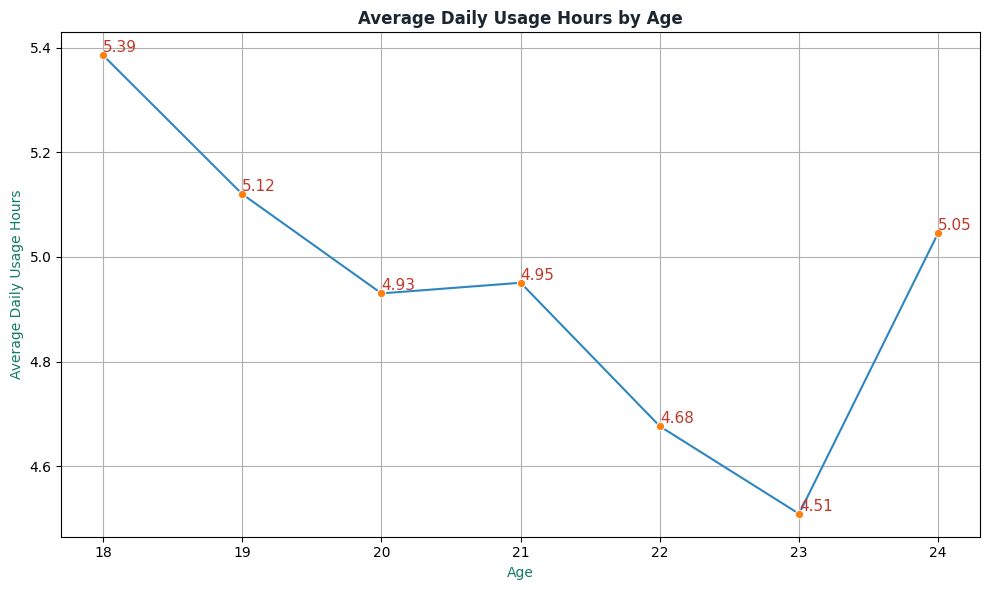

In [ ]:
data = df.groupby('Age')['Avg_Daily_Usage_Hours'].mean().reset_index()
plt.figure(figsize = (10, 6))

# creating a lineplot
ax = sns.lineplot(
    x = 'Age', y = 'Avg_Daily_Usage_Hours',
    data = data, marker = 'o',
    markerfacecolor = '#FF7F0E',
    color = '#2E86C1'
)
plt.title('Average Daily Usage Hours by Age', color = '#1B2631', weight = 'bold')  # near-black title
plt.ylabel('Average Daily Usage Hours', color = '#117A65')
plt.xlabel('Age', color = '#117A65')
plt.grid(True)

# Add labels to the data points
for x, y in df.groupby('Age')['Avg_Daily_Usage_Hours'].mean().reset_index().values:
    plt.text(x, y, f'{y:.2f}', ha = 'left', va = 'bottom', color = '#C0392B', fontsize = 11)  # rich red labels

plt.tight_layout()
plt.show()


**Line plot Insight:**
- *Average daily social media usage hours tend to decrease as age people get older, with a significant increase at age 24*.

---
## **Storytelling Deliverable – 10-Line Summary**

1. Our analysis shows that **high school students** have the **highest social media addiction scores**, making them the **most at risk**.  
2. While older students spend **slightly less time online**, **high usage at any age** still leads to **greater addiction levels**.  
3. Addiction scores for **males (6.3)** and **females (6.5)** are similar, showing that **gender is not a major factor**.  
4. Heavy social media use is linked to **reduced sleep hours** and **lower mental health scores**, harming overall **well-being**.  
5. Excessive usage also causes **more frequent arguments** and **relationship conflicts**.  
6. The **majority of students** fall into the **medium-risk usage group**, making this a **widespread concern**.  
7. **Younger students** face stronger negative effects, including **poor sleep patterns** and **reduced academic performance**.  
8. Without action, these patterns may **worsen mental health** and **damage interpersonal relationships** over time.  
9. We recommend **daily app usage limits**, more **screen-free activities**, and **awareness programs** in schools.  
10. For **high-risk individuals**, structured **digital detox plans** and **professional counseling** are **essential for recovery**.  
---